In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("D:/MKCE/0.MKCE/3.Logistic Regression/2 Project/Vaccine Usage Prediction/Dataset/h1n1_vaccine_prediction.csv")

In [3]:
data.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [4]:
data.shape

(26707, 34)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

In [6]:
X=pd.get_dummies(data)

In [7]:
X.columns

Index(['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'no_of_adults',
       'no_of_children', 'h1n1_vaccine', 'age_bracket_18 - 34 Years',
       'age_bracket_35 - 44 Years', 'age_bracket_45 - 54 Years',
       'age_bracket_55 - 64 Years', 'age_bracket_65+ Years',
       'qualification_12 Years', 'qualification_< 12 Years',
       'qualification_College Graduate', 'qualification_Some College',
       'race_Black', 'race_Hispanic', 'race_Other or Multiple', 'race_White',
       'sex_Female', 'sex_Male', 'income

In [8]:
Y=X["h1n1_vaccine"]
df=X[['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'no_of_adults',
       'no_of_children', 'age_bracket_18 - 34 Years',
       'age_bracket_35 - 44 Years', 'age_bracket_45 - 54 Years',
       'age_bracket_55 - 64 Years', 'age_bracket_65+ Years',
       'qualification_12 Years', 'qualification_< 12 Years',
       'qualification_College Graduate', 'qualification_Some College',
       'race_Black', 'race_Hispanic', 'race_Other or Multiple', 'race_White',
       'sex_Female', 'sex_Male', 'income_level_<= $75,000, Above Poverty',
       'income_level_> $75,000', 'income_level_Below Poverty',
       'marital_status_Married', 'marital_status_Not Married',
       'housing_status_Own', 'housing_status_Rent', 'employment_Employed',
       'employment_Not in Labor Force', 'employment_Unemployed',
       'census_msa_MSA, Not Principle  City', 'census_msa_MSA, Principle City',
       'census_msa_Non-MSA']]

In [9]:
df

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,marital_status_Married,marital_status_Not Married,housing_status_Own,housing_status_Rent,employment_Employed,employment_Not in Labor Force,employment_Unemployed,"census_msa_MSA, Not Principle City","census_msa_MSA, Principle City",census_msa_Non-MSA
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0,1,1,0,0,1,0,0,0,1
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0,1,0,1,1,0,0,1,0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,1,1,0,1,0,0,1,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0,1,0,1,0,1,0,0,1,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,1,0,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0,1,1,0,0,1,0,0,0,1
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0,1,0,1,1,0,0,0,1,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0,1,1,0,0,0,0,1,0,0
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,1,0,0,1,1,0,0,0,0,1


<AxesSubplot:>

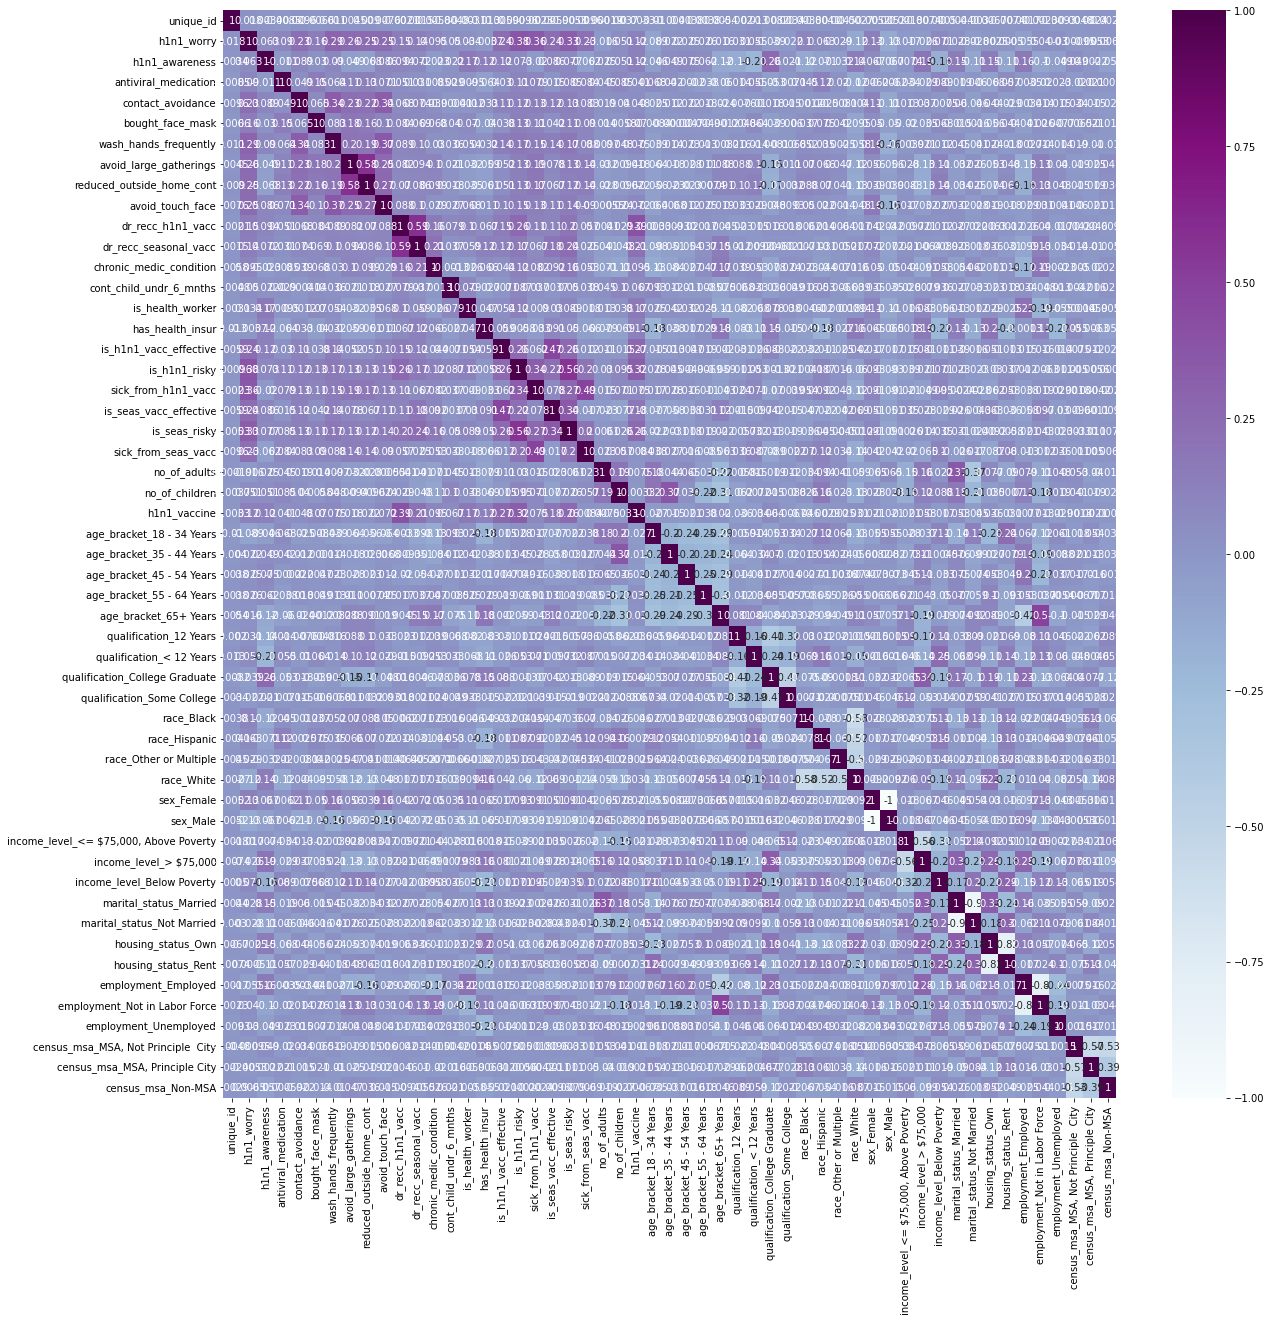

In [28]:
plt.figure(figsize=(20,20))
sns.heatmap(X.corr(),cmap="BuPu",annot=True)

In [29]:
X.corr()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,marital_status_Married,marital_status_Not Married,housing_status_Own,housing_status_Rent,employment_Employed,employment_Not in Labor Force,employment_Unemployed,"census_msa_MSA, Not Principle City","census_msa_MSA, Principle City",census_msa_Non-MSA
unique_id,1.000000,0.017839,0.003425,-0.008475,0.009638,-0.006644,0.011105,0.004539,0.009011,0.007575,...,0.004356,-0.003021,0.006695,-0.007372,0.001738,0.002272,-0.009269,-0.004773,0.002355,0.002916
h1n1_worry,0.017839,1.000000,0.062522,0.090301,0.233713,0.156032,0.293565,0.255031,0.246424,0.248016,...,0.028144,-0.028375,-0.002538,0.000505,-0.054556,0.039913,0.030406,-0.000947,-0.005315,0.006520
h1n1_awareness,0.003425,0.062522,1.000000,-0.010836,0.088839,0.030050,0.089785,-0.048898,-0.068219,0.086162,...,0.145605,-0.108907,0.152595,-0.108552,0.159457,-0.099735,-0.048832,0.049434,0.002185,-0.057495
antiviral_medication,-0.008475,0.090301,-0.010836,1.000000,0.049247,0.146261,0.064119,0.106287,0.127679,0.070868,...,-0.019078,0.006049,-0.068315,0.056803,-0.003536,-0.020344,0.023077,-0.019833,0.021007,0.000588
contact_avoidance,0.009638,0.233713,0.088839,0.049247,1.000000,0.064946,0.338130,0.227675,0.220348,0.335335,...,0.059727,-0.045542,0.043905,-0.029113,-0.003380,0.013702,0.014531,0.033986,-0.015164,-0.022401
bought_face_mask,-0.006644,0.156032,0.030050,0.146261,0.064946,1.000000,0.083363,0.180907,0.163382,0.104335,...,-0.015273,0.001636,-0.055806,0.043503,-0.040789,0.026419,0.007717,-0.006464,0.021065,-0.014414
wash_hands_frequently,0.011105,0.293565,0.089785,0.064119,0.338130,0.083363,1.000000,0.195364,0.192619,0.365064,...,0.044587,-0.041319,0.023610,-0.017554,-0.002653,0.014499,-0.014203,0.018721,-0.010488,-0.010151
avoid_large_gatherings,0.004539,0.255031,-0.048898,0.106287,0.227675,0.180907,0.195364,1.000000,0.584085,0.253683,...,-0.031675,0.025924,-0.053142,0.047647,-0.147193,0.127517,0.039955,-0.019431,-0.024871,0.047266
reduced_outside_home_cont,0.009011,0.246424,-0.068219,0.127679,0.220348,0.163382,0.192619,0.584085,1.000000,0.267719,...,-0.034405,0.025196,-0.073906,0.063404,-0.156184,0.126433,0.048489,-0.015146,-0.018686,0.036118
avoid_touch_face,0.007575,0.248016,0.086162,0.070868,0.335335,0.104335,0.365064,0.253683,0.267719,1.000000,...,0.031748,-0.028443,0.019454,-0.018100,-0.029395,0.031345,0.004143,0.006024,-0.021289,0.015133


In [30]:
for i in df.columns:
  if df[i].isna().sum()>=0:
    if df[i].dtype=='float64' or df[i].dtype=='int64':
      df[i]=df[i].fillna(df[i].mean())
    elif df[i].dtype=='O':
      df[i]=df[i].fillna(df[i].mode()[0])

C:\Users\User\AppData\Local\Temp/ipykernel_14428/2365894822.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i]=df[i].fillna(df[i].mean())


In [31]:
df.isna().sum()

unique_id                                 0
h1n1_worry                                0
h1n1_awareness                            0
antiviral_medication                      0
contact_avoidance                         0
bought_face_mask                          0
wash_hands_frequently                     0
avoid_large_gatherings                    0
reduced_outside_home_cont                 0
avoid_touch_face                          0
dr_recc_h1n1_vacc                         0
dr_recc_seasonal_vacc                     0
chronic_medic_condition                   0
cont_child_undr_6_mnths                   0
is_health_worker                          0
has_health_insur                          0
is_h1n1_vacc_effective                    0
is_h1n1_risky                             0
sick_from_h1n1_vacc                       0
is_seas_vacc_effective                    0
is_seas_risky                             0
sick_from_seas_vacc                       0
no_of_adults                    

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
sd=StandardScaler()

In [34]:
scaled=pd.DataFrame(sd.fit_transform(df),columns=df.columns)

In [35]:
scaled

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,marital_status_Married,marital_status_Not Married,housing_status_Own,housing_status_Rent,employment_Employed,employment_Not in Labor Force,employment_Unemployed,"census_msa_MSA, Not Principle City","census_msa_MSA, Principle City",census_msa_Non-MSA
0,-1.731986,-0.680609,-2.046928,-0.226911,-1.632555,-0.272298,-2.177583,-0.749009,1.403796,0.691971,...,-1.015205,1.128759,0.652256,-0.534182,-1.015586,1.269015,-0.239865,-0.879282,-0.646021,1.646310
1,-1.731856,1.520279,1.195647,-0.226911,0.617345,-0.272298,0.459948,-0.749009,1.403796,0.691971,...,-1.015205,1.128759,-1.533141,1.872023,0.984654,-0.788013,-0.239865,1.137291,-0.646021,-0.607419
2,-1.731727,-0.680609,-0.425641,-0.226911,0.617345,-0.272298,-2.177583,-0.749009,-0.714548,-1.452107,...,-1.015205,1.128759,0.652256,-0.534182,0.984654,-0.788013,-0.239865,1.137291,-0.646021,-0.607419
3,-1.731597,-0.680609,-0.425641,-0.226911,0.617345,-0.272298,0.459948,1.339461,-0.714548,-1.452107,...,-1.015205,1.128759,-1.533141,1.872023,-1.015586,1.269015,-0.239865,-0.879282,1.547937,-0.607419
4,-1.731467,0.419835,-0.425641,-0.226911,0.617345,-0.272298,0.459948,1.339461,-0.714548,0.691971,...,0.985022,-0.885929,0.652256,-0.534182,0.984654,-0.788013,-0.239865,1.137291,-0.646021,-0.607419
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,1.731467,0.419835,-2.046928,-0.226911,0.617345,-0.272298,-2.177583,-0.749009,1.403796,-1.452107,...,-1.015205,1.128759,0.652256,-0.534182,-1.015586,1.269015,-0.239865,-0.879282,-0.646021,1.646310
26703,1.731597,-0.680609,1.195647,-0.226911,0.617345,-0.272298,0.459948,-0.749009,-0.714548,-1.452107,...,-1.015205,1.128759,-1.533141,1.872023,0.984654,-0.788013,-0.239865,-0.879282,1.547937,-0.607419
26704,1.731727,0.419835,1.195647,-0.226911,0.617345,3.675062,0.459948,1.339461,-0.714548,0.691971,...,-1.015205,1.128759,0.652256,-0.534182,-1.015586,-0.788013,-0.239865,1.137291,-0.646021,-0.607419
26705,1.731856,-0.680609,-0.425641,-0.226911,-1.632555,-0.272298,-2.177583,-0.749009,-0.714548,0.000000,...,0.985022,-0.885929,-1.533141,1.872023,0.984654,-0.788013,-0.239865,-0.879282,-0.646021,1.646310


In [36]:
from sklearn.decomposition import PCA
pca=PCA(n_components=40)
principalComponents=pca.fit_transform(scaled)
principledf=pd.DataFrame(principalComponents)

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [46]:
df_train,df_test,Y_train,Y_test=train_test_split(principledf,Y,test_size=0.25,random_state=123)

In [47]:
df_train.shape,df_test.shape,Y_train.shape,Y_test.shape

((20030, 40), (6677, 40), (20030,), (6677,))

In [48]:
model=LogisticRegression()
model.fit(df_train,Y_train)

LogisticRegression()

In [49]:
Ypred=model.predict(df_test)

In [50]:
model.score(df_test,Y_test)

0.8253706754530478

In [51]:
from sklearn.metrics import  accuracy_score,confusion_matrix,classification_report

In [52]:
accuracy_score(Y_test,Ypred)

0.8253706754530478

In [45]:
confusion_matrix(Y_test,Ypred)

array([[3970,  221],
       [ 687,  464]], dtype=int64)